In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score

DATA LOAD

In [2]:
trainset = pd.read_csv('train.csv')
testset = pd.read_csv('test.csv')

VISUALIZE DATA TO UNDERSTAND

In [3]:
trainset.describe().T

count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp          8.0000  
Parch          6.0000  
Fare         512.3292

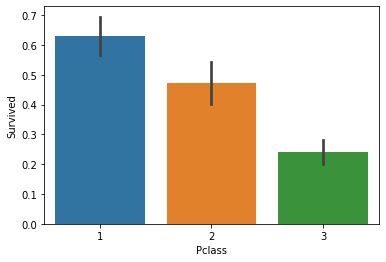

In [4]:
sns.barplot(x="Pclass",y="Survived", data=trainset)

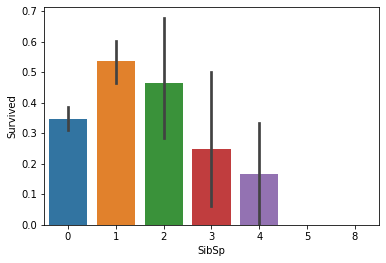

In [5]:
sns.barplot(x="SibSp",y="Survived", data=trainset)

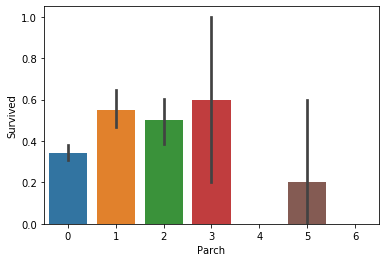

In [6]:
sns.barplot(x="Parch",y="Survived", data=trainset)

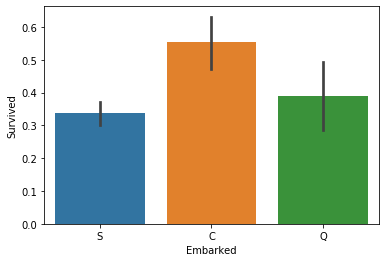

In [7]:
sns.barplot(x="Embarked",y="Survived", data=trainset)

DROP UNECESSARY VARIABLES

In [8]:
trainset = trainset.drop(columns = ['PassengerId','Name', 'Ticket','Cabin'])
testset = testset.drop(columns = ['Name', 'Ticket','Cabin'])

HANDELING MISSING DATA

In [9]:
trainset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
testset.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [11]:
#trainset and testset NaN values handeling 
#remplacing Nan Age values by the mean Age
#Replacing NaN Embarked values by the the common value
#Replacing NaN Fare values by the mean Fares

trainset['Age'] = trainset['Age'].replace(np.NaN,int(trainset['Age'].mean()))
trainset['Embarked'] = trainset['Embarked'].replace(np.NaN,trainset['Embarked'].value_counts().index[0])

testset['Age'] = testset['Age'].replace(np.NaN,int(trainset['Age'].mean()))
testset['Fare'] = testset['Fare'].replace(np.NaN,int(trainset['Fare'].mean()))

In [12]:
trainset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
testset.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

CONVERTING 'SEX' AND 'EMBARKED' TO NUMERICAL VALUES

In [14]:
trainset.loc[trainset['Sex'] == 'male', 'Sex'] = 0
trainset.loc[trainset['Sex'] == 'female', 'Sex'] = 1
testset.loc[testset['Sex'] == 'male', 'Sex'] = 0
testset.loc[testset['Sex'] == 'female', 'Sex'] = 1

trainset.loc[trainset['Embarked'] == 'C', 'Embarked'] = 0
trainset.loc[trainset['Embarked'] == 'Q', 'Embarked'] = 1
trainset.loc[trainset['Embarked'] == 'S', 'Embarked'] = 2

testset.loc[testset['Embarked'] == 'C', 'Embarked'] = 0
testset.loc[testset['Embarked'] == 'Q', 'Embarked'] = 1
testset.loc[testset['Embarked'] == 'S', 'Embarked'] = 2

In [15]:
trainset

Survived  Pclass Sex   Age  SibSp  Parch     Fare Embarked
0           0       3   0  22.0      1      0   7.2500        2
1           1       1   1  38.0      1      0  71.2833        0
2           1       3   1  26.0      0      0   7.9250        2
3           1       1   1  35.0      1      0  53.1000        2
4           0       3   0  35.0      0      0   8.0500        2
..        ...     ...  ..   ...    ...    ...      ...      ...
886         0       2   0  27.0      0      0  13.0000        2
887         1       1   1  19.0      0      0  30.0000        2
888         0       3   1  29.0      1      2  23.4500        2
889         1       1   0  26.0      0      0  30.0000        0
890         0       3   0  32.0      0      0   7.7500        1

[891 rows x 8 columns]

In [16]:
testset

PassengerId  Pclass Sex   Age  SibSp  Parch      Fare Embarked
0            892       3   0  34.5      0      0    7.8292        1
1            893       3   1  47.0      1      0    7.0000        2
2            894       2   0  62.0      0      0    9.6875        1
3            895       3   0  27.0      0      0    8.6625        2
4            896       3   1  22.0      1      1   12.2875        2
..           ...     ...  ..   ...    ...    ...       ...      ...
413         1305       3   0  29.0      0      0    8.0500        2
414         1306       1   1  39.0      0      0  108.9000        0
415         1307       3   0  38.5      0      0    7.2500        2
416         1308       3   0  29.0      0      0    8.0500        2
417         1309       3   0  29.0      1      1   22.3583        0

[418 rows x 8 columns]

PREPARING DATA FOR THE LEARNING (X,y) USING SVM MACHINE LEARNING MODEL

In [17]:
X = trainset.drop('Survived' , axis = 1)
y = trainset['Survived']

#split trainset to a sub train and sub validation Datasets
X_train, X_val, y_train,y_val = train_test_split(X,y, test_size = 0.3 , random_state = 20)

In [18]:
#normalize and standardize data to see when our SVM model works better

#data nomralization
transformer = Normalizer().fit(X_train)
X_train_normalized = transformer.transform(X_train)
X_val_normalized = transformer.transform(X_val)

#data Standardisation
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_val_std = scaler.transform(X_val)


In [19]:
#parameters choosen for the GridSearch we will apply on SVM hyperparameters optimization
svm_grid_paramaters = [
        {
            "kernel": ["linear"],
            "C": [1, 10, 100, 1000]
        },
        {
            "kernel": ["rbf"],
            "C": [1, 10, 100, 1000],
            "gamma": [1e-2, 1e-3, 1e-4, 1e-5]
        }
    ]

In [20]:
#executing the GridSearch using normalized and standardized data
GridSearch_svm_normalized = GridSearchCV(SVC(), svm_grid_paramaters,cv=3 , scoring='accuracy')
GridSearch_svm_normalized.fit(X_train_normalized,y_train)

GridSearch_svm_std = GridSearchCV(SVC(), svm_grid_paramaters,cv=3,scoring='accuracy')
GridSearch_svm_std.fit(X_train_std,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001, 1e-05],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [21]:
#evaluate predictions on normalized validation set
model_svm_normalized = GridSearch_svm_normalized.best_estimator_
svm_normalized_predictions = model_svm_normalized.predict(X_val_normalized)

accuracy = accuracy_score(y_val, svm_normalized_predictions)
precision=precision_score(y_val, svm_normalized_predictions)
recall=recall_score(y_val, svm_normalized_predictions)
print("Accuracy: %.2f%% " % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))

Accuracy: 77.61% 
Precision: 68.63% 
Recall: 71.43% 


In [22]:
#evaluate predictions on standardized validation set
model_svm_std = GridSearch_svm_std.best_estimator_
svm_std_predictions = model_svm_std.predict(X_val_std)

#evaluate predictions
accuracy = accuracy_score(y_val, svm_std_predictions)
precision=precision_score(y_val, svm_std_predictions)
recall=recall_score(y_val, svm_std_predictions)
print("Accuracy: %.2f%% " % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))

Accuracy: 82.84% 
Precision: 82.50% 
Recall: 67.35% 


SHOW AND SAVE RESULTS IN CSV

In [23]:
#SVM on standardized Data works better so we'll train the standardized SVM version on the whole trainset

#data standardization (based on the whole trainset this time)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_test = scaler.transform(testset.drop('PassengerId', axis = 1))

#fit the best standardized SVM version to the whole trainset
model_svm_std.fit(X,y)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
#evaluate predictions on standardized trainset (juste to see what it looks like)
svm_train_predictions = model_svm_std.predict(X)

#evaluate predictions
accuracy = accuracy_score(y, svm_train_predictions)
precision=precision_score(y, svm_train_predictions)
recall=recall_score(y, svm_train_predictions)
print("Accuracy: %.2f%% " % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))

Accuracy: 83.50% 
Precision: 82.83% 
Recall: 71.93% 


In [25]:
#store data as pandas
results_std = pd.DataFrame({'PassengerId' : testset['PassengerId']  , 'Survived' : model_svm_std.predict(X_test)})

#save data as csv
results_std.to_csv('gender_submission.csv',index=False)

In [26]:
results_std['Survived'].value_counts()

0    270
1    148
Name: Survived, dtype: int64